In [1]:
import nltk
import matplotlib.pyplot as plt
from pprint import pprint
from functools import reduce
from operator import iconcat
from nltk.tag.hmm import HiddenMarkovModelTrainer
from sklearn import metrics

In [2]:
def process_file(fname:str)->list:
    with open(fname, "r") as f:
        data = f.read()
    data = data.split("\n\n")
    data = list(map(lambda x:x.split("\n"), data))
    data = list(map(lambda x:[tuple(s.split("\t"))[::-1] for s in x], data))
    return data

def to_list(data:list)->list:
    return reduce(iconcat, data, [])

def split_words_n_tags(data:list)->tuple:
    words, tags = map(list, zip(*data))
    return words, tags

def retrive_sentences(data:list)->list:
    return list(map(lambda x:[w for w,t in x], data))

In [3]:
data = process_file("engtrain.bio")

In [4]:
len(data)

9776

In [5]:
data.pop()

[('',)]

In [6]:
pprint(data[0])

[('what', 'O'),
 ('movies', 'O'),
 ('star', 'O'),
 ('bruce', 'B-ACTOR'),
 ('willis', 'I-ACTOR')]


In [7]:
all_tuples = to_list(data)
all_words, all_tags = split_words_n_tags(all_tuples)

In [8]:
wordFDist = nltk.FreqDist(all_words)
wordFDist.B()

6710

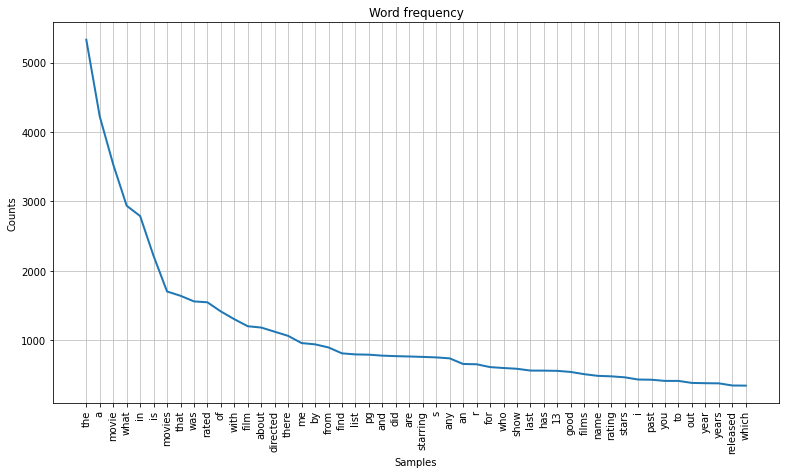

In [9]:
plt.figure(figsize=(13, 7))
wordFDist.plot(50, title="Word frequency")
plt.show()

In [10]:
tagFDist = nltk.FreqDist(all_tags)
tagFDist.B()

25

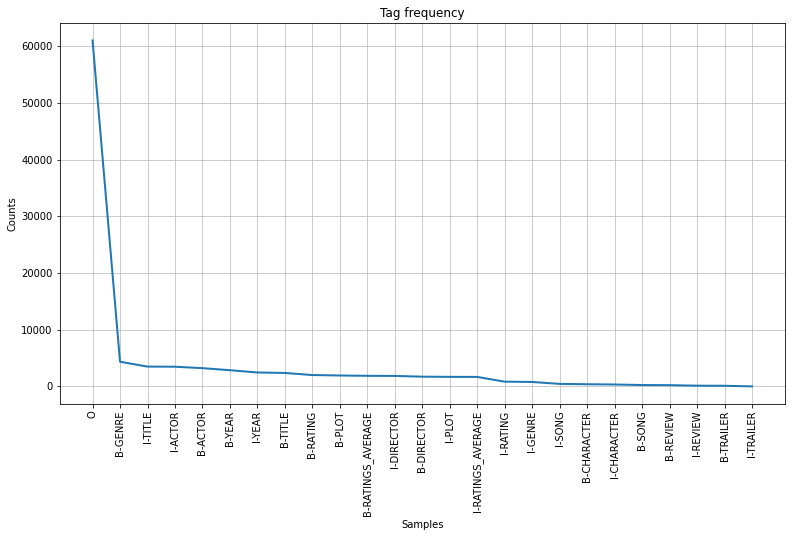

In [11]:
plt.figure(figsize=(13, 7))
tagFDist.plot(50, title="Tag frequency")
plt.show()

In [12]:
tagger = HiddenMarkovModelTrainer().train_supervised(data)

In [13]:
test = process_file("engtest.bio")

In [14]:
len(test)

2444

In [15]:
test.pop()

[('',)]

In [16]:
query = split_words_n_tags(test[23])
print(tagger.tag(query[0]))
print(test[23])

[('who', 'O'), ('directed', 'O'), ('the', 'O'), ('film', 'O'), ('pulp', 'B-TITLE'), ('fiction', 'I-TITLE'), ('that', 'O'), ('starred', 'O'), ('john', 'B-ACTOR'), ('travolta', 'I-ACTOR')]
[('who', 'O'), ('directed', 'B-DIRECTOR'), ('the', 'O'), ('film', 'O'), ('pulp', 'B-TITLE'), ('fiction', 'I-TITLE'), ('that', 'O'), ('starred', 'O'), ('john', 'B-ACTOR'), ('travolta', 'I-ACTOR')]


In [17]:
query = split_words_n_tags(test[237])
print(tagger.tag(query[0]))
print(test[237])

[('i', 'O'), ('am', 'O'), ('looking', 'O'), ('for', 'O'), ('a', 'O'), ('pg', 'B-RATING'), ('rated', 'I-RATING'), ('disney', 'B-GENRE'), ('movie', 'O')]
[('i', 'O'), ('am', 'O'), ('looking', 'O'), ('for', 'O'), ('a', 'O'), ('pg', 'B-RATING'), ('rated', 'O'), ('disney', 'B-GENRE'), ('movie', 'O')]


In [18]:
tagger.test(test)

accuracy over 24686 tokens: 84.12


In [19]:
all_tuples_test = to_list(test)
words, labels = split_words_n_tags(all_tuples_test)

In [20]:
sentences = retrive_sentences(test)

In [21]:
all_tuples_predictions = to_list(tagger.tag_sents(sentences))
_, predictions = split_words_n_tags(all_tuples_predictions)

In [22]:
pprint(metrics.classification_report(labels, predictions))

/home/gabriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('                   precision    recall  f1-score   support\n'
 '\n'
 '          B-ACTOR       0.87      0.82      0.84       812\n'
 '      B-CHARACTER       0.40      0.37      0.38        90\n'
 '       B-DIRECTOR       0.80      0.59      0.68       456\n'
 '          B-GENRE       0.92      0.91      0.92      1117\n'
 '           B-PLOT       0.58      0.47      0.52       491\n'
 '         B-RATING       0.97      0.90      0.94       500\n'
 'B-RATINGS_AVERAGE       0.88      0.73      0.80       451\n'
 '         B-REVIEW       0.17      0.20      0.18        56\n'
 '           B-SONG       0.33      0.24      0.28        54\n'
 '          B-TITLE       0.64      0.45      0.53       562\n'
 '        B-TRAILER       0.84      0.87      0.85        30\n'
 '           B-YEAR       0.93      0.82      0.87       720\n'
 '          I-ACTOR       0.91      0.76      0.83       862\n'
 '      I-CHARACTER       0.45      0.32      0.38        75\n'
 '       I-DIRECTOR       0.86    